# Exploratory Data Analysis 
### a) Build data profile table and plots i) Outliers and Anamolies
### b) Explore data relationships
### c) Identificationand creation of features

In [142]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# cntl ? makes something a comment
# esc - shift R enter runs all above
#esc cmd shift R runs all cells
# esc 1, 2, 3, 4, 5 makes something a kind of header
# esc X cuts a cell

In [143]:
os.getcwd()

'/Users/Livi/Projects/blm/capcookie/notebooks'

In [144]:
df = pd.read_csv('/Users/Livi/Projects/blm/capcookie/data/interim/fatalwrangling.csv', index_col=0)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Should I have dropped the 'id' column in Wrangling? Does it matter?

In [145]:
df.drop(columns='id', inplace=True)

In [146]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Not many numerical columns to show. Just age.

Text(0, 0.5, 'Number Killed')

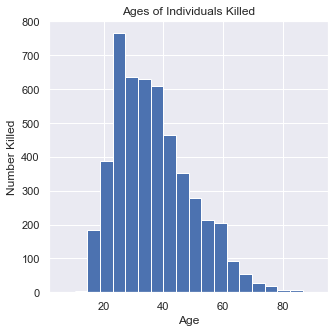

In [147]:
df.age.hist(bins=20, figsize=(5,5))
plt.title('Ages of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Number Killed')

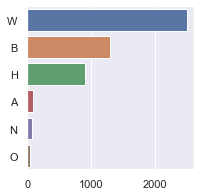

In [148]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
killed_by_police = pd.DataFrame(df.race.value_counts())
races = list(killed_by_police.index)
values = list(killed_by_police.race)
sns.barplot(x=values, y=races)

# I read some articles arguing that numbers alone don't tell the story. These articles said we should look at deaths as compared to national population.
#### https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html
#### I used Census pop estimates from 2019

In [149]:
Census_pop_counts_today = pd.DataFrame([250522190, 44075086, 60572237 , 19504862, 4188092, 9949293],['W','B','H','A','N','O'],columns=['US_pop'])

In [150]:
z = pd.concat([killed_by_police, Census_pop_counts_today], axis=1)
z.columns = ['killed_by_police', 'US_pop']
z['deaths_per_cap'] = z.killed_by_police / z.US_pop
z

,killed_by_police,US_pop,deaths_per_cap
W,2502,250522190,0.000010
B,1305,44075086,0.000030
H,910,60572237,0.000015
A,94,19504862,0.000005
N,78,4188092,0.000019
O,48,9949293,0.000005


Text(0, 0.5, 'Deaths Per Capita')

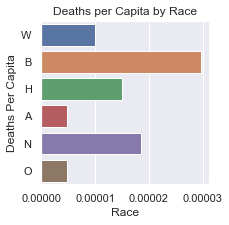

In [151]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
races = list(z.index)
values = list(z.deaths_per_cap)
sns.barplot(x=values, y=races)
plt.title('Deaths per Capita by Race')
plt.xlabel('Race')
plt.ylabel('Deaths Per Capita')

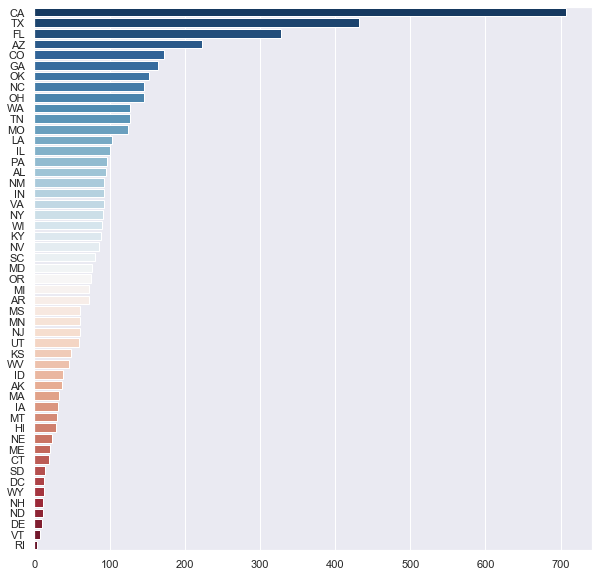

In [152]:
# Now do the same for states! 
f, ax = plt.subplots(figsize=(10,10))
y = pd.DataFrame(df.state.value_counts())
states = list(y.index)
values = list(y.state)
sns.barplot(x=values,y=states, palette="RdBu_r")

### Is this valid as EDA? I'm just curious what the race value counts in CA are, since so many deaths happened there.

In [153]:
df[df.state=='CA'].race.value_counts()

H    318
W    222
B    124
A     30
O      9
N      4
Name: race, dtype: int64

### Now I'm curious how the races of folks killed in cities with less deaths compares to those in cities with more deaths.

In [154]:
df.city.value_counts().head(60)

Los Angeles         78
Phoenix             67
Houston             51
Las Vegas           41
San Antonio         40
Chicago             38
Columbus            36
Jacksonville        32
Albuquerque         32
Oklahoma City       31
St. Louis           30
Kansas City         30
Austin              29
Miami               26
Denver              24
Tucson              23
Louisville          23
Bakersfield         22
Atlanta             22
New York            21
Tulsa               21
Orlando             20
Mesa                20
Baltimore           19
Indianapolis        18
Portland            18
Fresno              18
Pueblo              17
Long Beach          17
San Diego           16
Philadelphia        16
Colorado Springs    16
Charlotte           16
Springfield         15
Washington          15
San Jose            15
Arlington           15
Milwaukee           15
San Francisco       15
Memphis             15
Aurora              15
San Bernardino      14
Dallas              14
Greenville 

In [155]:
# Cities will less than 12 deaths.
df.city.value_counts()[df.city.value_counts() < 12].head()

Spokane       11
Las Cruces    11
Richmond      11
Wichita       11
Tampa         11
Name: city, dtype: int64

In [156]:
# How many people were killed in cities with less than 12 deaths? 3750 out of 4500!!!

df.city.value_counts()[df.city.value_counts() < 12].sum()

3750

### Making a dataframe so I can see the racial makeup of victims in low-death cities

In [157]:
cities = pd.Series(df.city.value_counts()[df.city.value_counts() < 12].index)
df.merge(cities.rename('new'), left_on='city', right_on='new').race.value_counts()

W    2143
B     863
H     584
N      64
A      60
O      36
Name: race, dtype: int64

### Doing the same for higher-death cities

In [158]:
bigcities = pd.Series(df.city.value_counts()[df.city.value_counts() >= 12].index)
df.merge(bigcities.rename('new'), left_on='city', right_on='new').race.value_counts()

B    442
W    359
H    326
A     34
N     14
O     12
Name: race, dtype: int64

## Wow. This is an interesting distinction: cities with less police killings see more white victims. Cities with more police killings see more black and hispanic killings
### If I could think of a clever way to visualize this difference I would. 
### But it would prob take me a couple hours and I don't know if it's necessary to graph it, since the numbers paint an interesting-enough picture

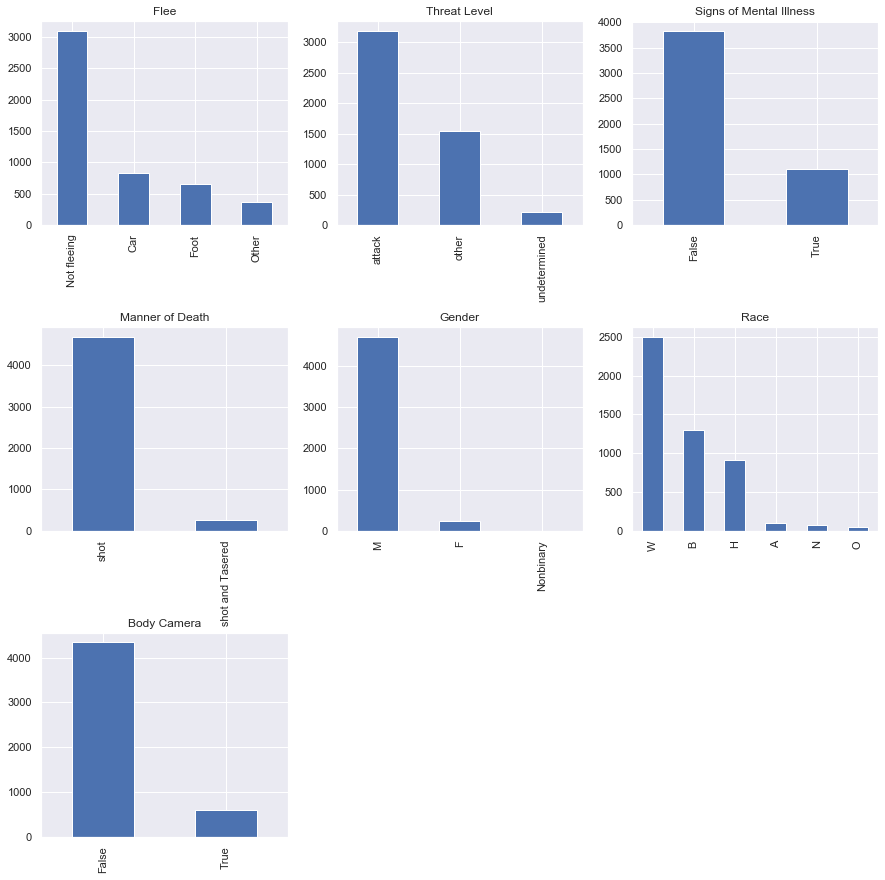

In [159]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331)   
df.flee.value_counts().plot(kind='bar')
plt.gca().set_title('Flee')

fig.add_subplot(332)   
df.threat_level.value_counts().plot(kind='bar')
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
df.signs_of_mental_illness.value_counts().plot(kind='bar')
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
df.manner_of_death.value_counts().plot(kind='bar')
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
df.gender.value_counts().plot(kind='bar')
plt.gca().set_title('Gender')

fig.add_subplot(336)  
df.race.value_counts().plot(kind='bar')
plt.gca().set_title('Race')

fig.add_subplot(337)  
df.body_camera.value_counts().plot(kind='bar')
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)


plt.show()


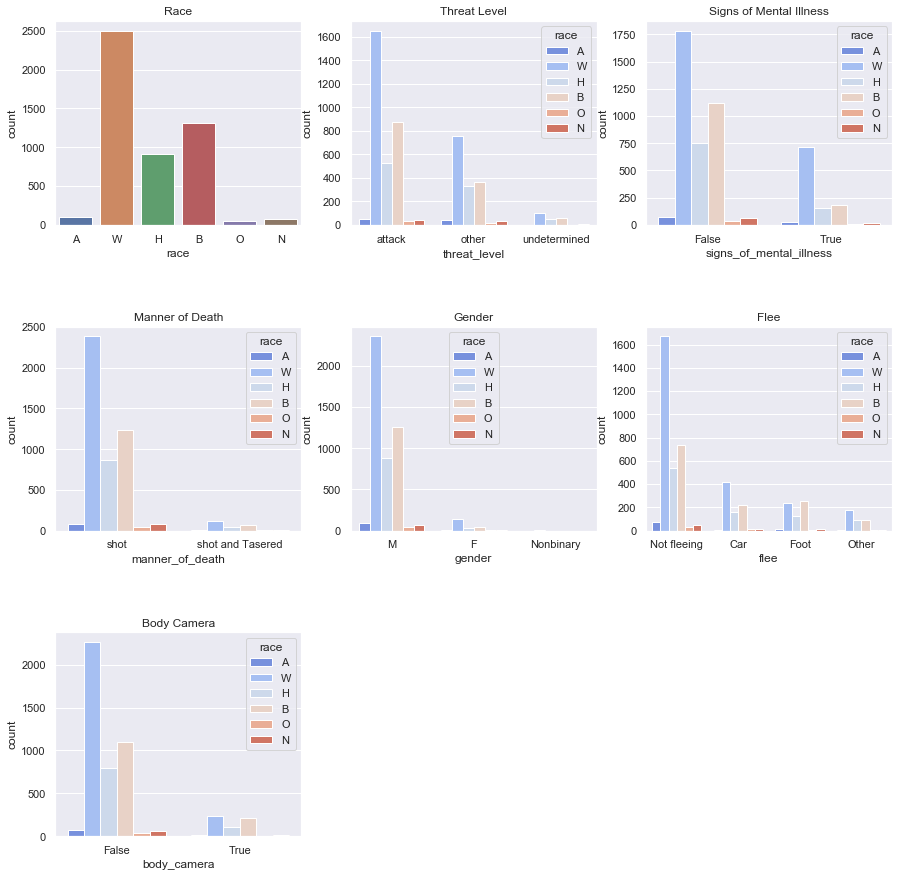

In [160]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331) 
sns.countplot(x='race', data=df)
plt.gca().set_title('Race')


fig.add_subplot(332)   
sns.countplot(x="threat_level",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
sns.countplot(x="signs_of_mental_illness",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
sns.countplot(x="manner_of_death",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
sns.countplot(x="gender",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Gender')

fig.add_subplot(336)  
sns.countplot(x="flee",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Flee')

fig.add_subplot(337)  
sns.countplot(x="body_camera",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)


plt.show()



## Anamolies and Outliers - Review boxplots

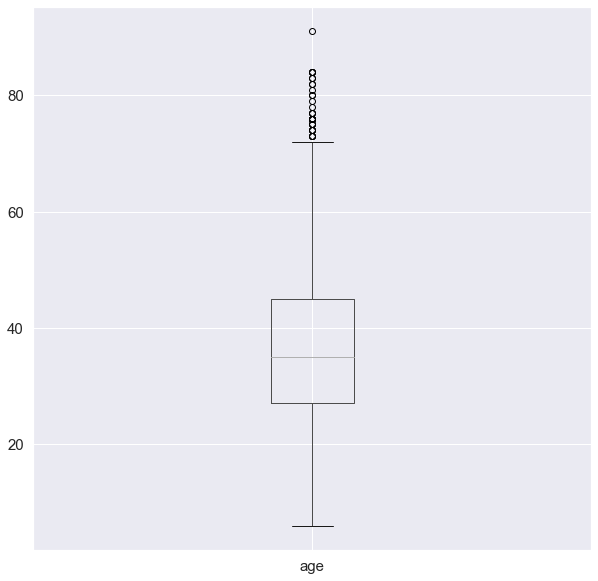

In [161]:
df.boxplot('age', vert=True, fontsize=15, figsize=(10,10))

In [162]:
df.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [163]:
df.flee.value_counts()
#0 not fleeing, 1 foot, 2 car, MEAN other

Not fleeing    3098
Car             823
Foot            650
Other           366
Name: flee, dtype: int64

In [164]:
df.threat_level.value_counts()
#2 attack, 1 other, MEAN undetermined??
# OR 1 attack, 0 other, MEAN undetermined

attack          3186
other           1541
undetermined     210
Name: threat_level, dtype: int64

In [165]:
df.manner_of_death.value_counts()
# this really isn't very telling or interesting at all

shot                4688
shot and Tasered     249
Name: manner_of_death, dtype: int64

In [140]:
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, other=0)
df['armed']



In [136]:
pd.set_option('display.max_rows',200)
df.armed.value_counts()
#gun, knife, unarmed, undetermined, vehicle, "explosive", "other handheld object", "nonlethal gun" (pellet gun, beanbag gun)
#gun 1, explosive 1, vehicle 2, other projectile??, knife 3, other handheld object 3 or 4, nonlethal gun 5 (what about NAILGUN, BOW AND ARROW), other projectile??
# gun is def #1, knife and explosive  hmmm

# how about something that creates distance or operable over a distance???

# or lethality of weapon:
# gun, other explosive, sharp weapon/vehicle, sharp other object, 
# potentially lethal projectile (taser, nailgun, bow and arrow), nonlethal projectile, blunt object.



gun                                 2784
knife                                716
unarmed                              349
undetermined                         338
toy weapon                           173
vehicle                              134
unknown weapon                        66
machete                               40
Taser                                 24
sword                                 22
ax                                    21
baseball bat                          16
gun and knife                         15
hammer                                14
metal pipe                            12
screwdriver                           12
hatchet                               11
box cutter                            11
sharp object                          10
gun and vehicle                       10
gun and car                            9
scissors                               7
crossbow                               6
rock                                   6
pipe            

In [129]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,signs_of_mental_illness,body_camera
age,1.000000,0.100000,-0.040000
signs_of_mental_illness,0.100000,1.000000,0.040000
body_camera,-0.040000,0.040000,1.000000


In [ ]:
####THIS IS CODE I TRIED WHILE LEARNING TO MAKE SUBPLOTS, I WANT TO KEEP IT IN FOR MY OWN REFERENCE

#This changes the size of subplots

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 11.7,8.27


#fig, ax =plt.subplots(1,3)
#df.flee.value_counts().plot(kind='bar', ax=ax[0])
#df.threat_level.value_counts().plot(kind='bar',ax=ax[1])
#df.signs_of_mental_illness.value_counts().plot(kind='bar', ax=ax[2])
#fig.tight_layout()
#fig.show()

In [128]:
#also for my own reference
#this changes figsize
#sns.set(rc={'figure.figsize':(5,5)})

#sns.countplot(df.flee)